In [26]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()
   
    labels_id =[]
    labels_class =[]
    for each in list_labels:
        labels_id.append(each[0])
        labels_class.append(each[1])
        
    series_labels = pd.DataFrame(labels_class, index=labels_id)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['label']
print df_labels.head()
print df_labels.tail()

                label
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
            label
60739  functional
27263  functional
37057  functional
31282  functional
26348  functional


In [27]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    list_pumps_id = []
    list_pumps_fields = []
    for each in list_pumps:
        list_pumps_id.append(each[0])
        list_pumps_fields.append(each)

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps_fields, index=list_pumps_id)

    return df_pumps

df_data = load_wells()

print df_data.head()
print df_data.tail()

          0     1           2             3     4             5          6   \
69572  69572  6000  2011-03-14         Roman  1390         Roman  34.938093   
8776    8776     0  2013-03-06       Grumeti  1399       GRUMETI  34.698766   
34310  34310    25  2013-02-25  Lottery Club   686  World vision  37.460664   
67743  67743     0  2013-01-28        Unicef   263        UNICEF  38.486161   
19728  19728     0  2011-07-13   Action In A     0       Artisan  31.130847   

              7                     8  9          ...                  30  \
69572  -9.856322                  none  0         ...            annually   
8776   -2.147466              Zahanati  0         ...           never pay   
34310  -3.821329           Kwa Mahundi  0         ...          per bucket   
67743 -11.155298  Zahanati Ya Nanyumbu  0         ...           never pay   
19728  -1.825359               Shuleni  0         ...           never pay   

         31    32            33            34                 

In [28]:
df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [29]:
#df_data_installer = pd.get_dummies(df_data['installer'])
#print 'installer:',df_data_installer.shape
#df_data_wpt_name = pd.get_dummies(df_data['wpt_name'])
#print 'wpt_name:',df_data_wpt_name.shape
df_data_basin = pd.get_dummies(df_data['basin'])
print 'basin:',df_data_basin.shape
#df_data_subvillage = pd.get_dummies(df_data['subvillage'])
#print 'subvillage:',df_data_subvillage.shape
#df_data_lga = pd.get_dummies(df_data['lga'])
#print 'lga:',df_data_lga.shape
#df_data_ward = pd.get_dummies(df_data['ward'])
#print 'ward',df_data_ward.shape
df_data_public_meeting = pd.get_dummies(df_data['public_meeting'])
print 'Public Meeting:',df_data_public_meeting.shape
df_data_scheme_mgmnt = pd.get_dummies(df_data['scheme_management'])
print 'Scheme Management:',df_data_scheme_mgmnt.shape
df_data_permit = pd.get_dummies(df_data['permit'])
print 'permit:',df_data_permit.shape
df_data_extraction_type_group = pd.get_dummies(df_data['extraction_type_group'])
print 'Data Extraction:',df_data_extraction_type_group.shape
df_data_extraction_type_class = pd.get_dummies(df_data['extraction_type_class'])
print 'Data Extr Type:',df_data_extraction_type_class.shape
df_data_management_group = pd.get_dummies(df_data['management_group'])
print 'Management Group:',df_data_management_group.shape
df_data_payment_type = pd.get_dummies(df_data['payment_type'])
print 'Payment Type:',df_data_payment_type.shape
df_data_quality_group = pd.get_dummies(df_data['quality_group'])
print 'Quality Group:',df_data_quality_group.shape
df_data_quantity_group = pd.get_dummies(df_data['quantity_group'])
print 'Quantity Group:',df_data_quantity_group.shape
df_data_source_type = pd.get_dummies(df_data['source_type'])
print 'Source Type:',df_data_source_type.shape
df_data_source_class = pd.get_dummies(df_data['source_class'])
print 'Source Class:',df_data_source_class.shape
df_data_waterpoint_type_group = pd.get_dummies(df_data['waterpoint_type_group'])
print 'Waterpoint Type:',df_data_waterpoint_type_group.shape

basin: (59400, 9)
Public Meeting: (59400, 2)
Scheme Management: (59400, 12)
permit: (59400, 2)
Data Extraction: (59400, 13)
Data Extr Type: (59400, 7)
Management Group: (59400, 5)
Payment Type: (59400, 7)
Quality Group: (59400, 6)
Quantity Group: (59400, 5)
Source Type: (59400, 7)
Source Class: (59400, 3)
Waterpoint Type: (59400, 6)


In [30]:

df_data = df_data[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

df_coded = pd.concat([df_data,df_data_basin,df_data_public_meeting,df_data_scheme_mgmnt,df_data_permit,\
                      df_data_extraction_type_group,df_data_extraction_type_class,df_data_management_group,\
                      df_data_payment_type,df_data_quality_group,df_data_quantity_group,\
                      df_data_source_type,df_data_source_class,df_data_waterpoint_type_group],axis=1)

print df_data.shape
print df_coded.shape


(59400, 8)
(59400, 92)


In [31]:
df_coded.sort_index(inplace=True)
df_labels.sort_index(inplace=True)

print (df_labels.index == df_coded.index).sum()
print df_coded.shape

print len(df_labels)
print len(df_coded)

#for each in df_labels.index:
#    if any(df_coded.id == each):
#        print '-'
#    else:
#        print '+++++++++',each


59400
(59400, 92)
59400
59400


In [32]:
print df_coded.tail()
print df_labels.tail()

          id  amount_tsh  gps_height  longitude   latitude  region_code  \
74240  74240           0        1183  37.007726  -3.280868            2   
74242  74242           0           0  33.724987  -8.940758           12   
74243  74243           0        1188  33.963539  -1.429477           20   
74246  74246          50        1428  35.630481  -7.710549           11   
74247  74247          50         965  35.432998 -10.639270           10   

       district_code  population  Internal  Lake Nyasa  ...    spring  \
74240              7         350         0           0  ...         0   
74242              2           0         0           0  ...         0   
74243              6          95         0           0  ...         0   
74246              1           1         0           0  ...         1   
74247              2         900         0           0  ...         0   

       groundwater  surface  unknown  cattle trough  communal standpipe  dam  \
74240            0        1   

In [33]:
print (df_labels.index == df_coded.index).sum()
print df_coded.shape



59400
(59400, 92)


In [9]:
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)

print '-'
print X_pumps_train.head()
print '-'
print y_pumps_train.head()
print '-'
print X_pumps_test.head()
print '-'
print y_pumps_test.head()


-
          id  amount_tsh  gps_height  longitude      latitude  region_code  \
42628  42628           0        1365  34.570084 -8.838753e+00           11   
26072  26072           0        1481  34.051321 -1.906929e+00           20   
7782    7782           0         831  29.696167 -4.918685e+00           16   
9186    9186           0         405  38.680427 -1.074818e+01           90   
46261  46261           0           0   0.000000 -2.000000e-08           17   

       district_code  population  Internal  Lake Nyasa  ...    spring  \
42628              4          52         0           0  ...         0   
26072              4         250         0           0  ...         0   
7782               4           0         0           0  ...         0   
9186              33           1         0           0  ...         0   
46261              1           0         0           0  ...         0   

       groundwater  surface  unknown  cattle trough  communal standpipe  dam  \
42628     

In [10]:
import pylab as pl
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.481346801347
0.518249158249
0.518518518519

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.525521885522
0.52101010101

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.530774410774
0.52861952862

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.529562289562
0.531919191919


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


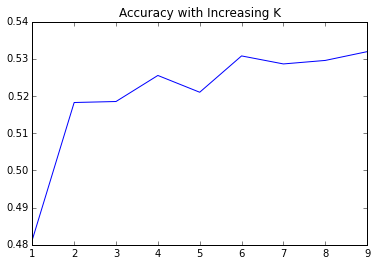

In [29]:
%matplotlib inline

results = []

for n in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=n)

    knn = clf.fit(X_pumps_train, y_pumps_train)
    preds = clf.predict(X_pumps_test)
    knn_score = clf.score(X_pumps_test,y_pumps_test)

    print knn_score
    results.append([n,knn_score])

results = pd.DataFrame(results, columns=["n", "accuracy"])

pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

In [30]:
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)

y_pumps_train_lbl = y_pumps_train[['label']]

logreg = LogisticRegression()

logreg.fit(X_pumps_train, y_pumps_train_lbl)

a = logreg.predict(X_pumps_test)
result = logreg.score(X_pumps_test, y_pumps_test[['label']])

print 'Logistic Regression Score:',str(result)

Logistic Regression Score: 0.710235690236


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.naive_bayes import GaussianNB

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

gaussian = GaussianNB()
gaussian.fit(X_pumps_train, y_pumps_train_lbl)
result = gaussian.score(X_pumps_test, y_pumps_test_lbl)

a = gaussian.predict(X_pumps_test)
v = gaussian.predict_proba(X_pumps_test)
result = gaussian.score(X_pumps_test, y_pumps_test_lbl)

print 'Gaussian Regression Score:',str(result)

Gaussian Regression Score: 0.342626262626


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVC

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)

y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

svc = SVC()
svc.fit(X_pumps_train, y_pumps_train_lbl)
a = svc.predict(X_pumps_test)
result = svc.score(X_pumps_test, y_pumps_test_lbl)

print 'SVC Regression Score:',str(result)

In [11]:
from sklearn.tree import DecisionTreeClassifier

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

dtc = DecisionTreeClassifier()
dtc.fit(X_pumps_train, y_pumps_train_lbl)
a = dtc.predict(X_pumps_test)
result = dtc.score(X_pumps_test, y_pumps_test_lbl)

print 'DTC Regression Score:',str(result)


DTC Regression Score: 0.736228956229


In [34]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]
    
rfc = RandomForestClassifier()
x = rfc.fit(X_pumps_train, y_pumps_train_lbl)
a = rfc.predict(X_pumps_test)

result = rfc.score(X_pumps_test, y_pumps_test_lbl)

print 'RFC Regression Score:',str(result)


RFC Regression Score: 0.781885521886


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [35]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
            'population','basin','public_meeting','scheme_management','permit',\
            'extraction_type_group','extraction_type_class','management_group',\
            'payment_type','quality_group','quantity_group',\
            'source_type','source_class','waterpoint_type_group']]

print test.head()

      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785           0    2013-02-04                    Dmdd        1996   
1  51630           0    2013-02-04  Government Of Tanzania        1569   
2  17168           0    2013-02-01                     NaN        1567   
3  45559           0    2013-01-22              Finn Water         267   
4  49871         500    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...          

In [36]:
tf_data_basin = pd.get_dummies(test['basin'])
print 'basin:',tf_data_basin.shape
tf_data_public_meeting = pd.get_dummies(test['public_meeting'])
print 'Public Meeting:',tf_data_public_meeting.shape
tf_data_scheme_mgmnt = pd.get_dummies(test['scheme_management'])
print 'Scheme Management:',tf_data_scheme_mgmnt.shape
tf_data_permit = pd.get_dummies(test['permit'])
print 'permit:',tf_data_permit.shape
tf_data_extraction_type_group = pd.get_dummies(test['extraction_type_group'])
print 'Data Extraction:',tf_data_extraction_type_group.shape
tf_data_extraction_type_class = pd.get_dummies(test['extraction_type_class'])
print 'Data Extr Type:',tf_data_extraction_type_class.shape
tf_data_management_group = pd.get_dummies(test['management_group'])
print 'Management Group:',tf_data_management_group.shape
tf_data_payment_type = pd.get_dummies(test['payment_type'])
print 'Payment Type:',tf_data_payment_type.shape
tf_data_quality_group = pd.get_dummies(test['quality_group'])
print 'Quality Group:',tf_data_quality_group.shape
tf_data_quantity_group = pd.get_dummies(test['quantity_group'])
print 'Quantity Group:',tf_data_quantity_group.shape
tf_data_source_type = pd.get_dummies(test['source_type'])
print 'Source Type:',tf_data_source_type.shape
tf_data_source_class = pd.get_dummies(test['source_class'])
print 'Source Class:',tf_data_source_class.shape
tf_data_waterpoint_type_group = pd.get_dummies(test['waterpoint_type_group'])
print 'Waterpoint Type:',tf_data_waterpoint_type_group.shape

basin: (14850, 9)
Public Meeting: (14850, 2)
Scheme Management: (14850, 11)
permit: (14850, 2)
Data Extraction: (14850, 13)
Data Extr Type: (14850, 7)
Management Group: (14850, 5)
Payment Type: (14850, 7)
Quality Group: (14850, 6)
Quantity Group: (14850, 5)
Source Type: (14850, 7)
Source Class: (14850, 3)
Waterpoint Type: (14850, 6)


In [37]:
tf_data = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

tf_coded = pd.concat([tf_data,tf_data_basin,tf_data_public_meeting,tf_data_scheme_mgmnt,tf_data_permit,\
                      tf_data_extraction_type_group,tf_data_extraction_type_class,tf_data_management_group,\
                      tf_data_payment_type,tf_data_quality_group,tf_data_quantity_group,\
                      tf_data_source_type,tf_data_source_class,tf_data_waterpoint_type_group],axis=1)

print tf_data.shape
print tf_coded.shape

(14850, 8)
(14850, 91)


In [41]:
#print list(tf_coded.columns.values)
#print "-"
#print list(df_coded)

#df_coded.drop('None', axis=1, inplace=True)
#for each in range(len(df_coded.columns.values)):
#    print tf_coded.columns.values[each]," - ",df_coded.columns.values[each]
    
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]
    
rfc = RandomForestClassifier()
x = rfc.fit(X_pumps_train, y_pumps_train_lbl)
a = rfc.predict(X_pumps_test)

result = rfc.score(X_pumps_test, y_pumps_test_lbl)

print 'RFC Regression Score:',str(result)


#pred = rfc.predict(tf_coded)

#rfc = RandomForestClassifier()
#pred = rfc.predict(X_pumps_test)


print result

RFC Regression Score: 0.784511784512
0.784511784512


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [42]:
print a

['non functional' 'functional' 'functional' ..., 'functional' 'functional'
 'functional']


In [44]:
pred = a

to_submit = []
print len(tf_coded)
for ind in range(len(tf_coded)):
    ids = tf_coded.id[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_5.csv', sep=',', index=False)


14850
      id    status_group
0  50785  non functional
1  51630      functional
2  17168      functional
3  45559      functional
4  49871      functional
          id    status_group
14845  39307  non functional
14846  18990  non functional
14847  28749      functional
14848  33492      functional
14849  68707      functional


In [46]:
print df_submit['status_group'].unique()

['non functional' 'functional' 'functional needs repair']


In [ ]:
'''
sklearn.featureselection.VarianceThresholds
'''